In [ ]:
import numpy as np
import pandas as pd
import urllib.request
import zipfile
import os
import re
import datetime
from sklearn import preprocessing
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
path_to_zip_file = 'votes_detail_data.zip'
path_to_taipeicity_sheet = 'votesdetail/taipeicity.xls'
path_to_register_votes_sheet = 'register_votes_result_data.xlsx'
register_votes_result_data_url = 'http://db.cec.gov.tw/histFile?voteCode=20181101A1B1&resourceCode=F1'
votes_detail_data = 'http://db.cec.gov.tw/histFile?voteCode=20181101A1B1&resourceCode=E1'
urllib.request.urlretrieve(register_votes_result_data_url, path_to_register_votes_sheet)
urllib.request.urlretrieve(votes_detail_data, path_to_zip_file)

In [3]:
#print(os.listdir())
#zip_ref = zipfile.ZipFile(path_to_zip_file, 'r')
#zip_ref.extractall('./')
#zip_ref.close()
#votes_detail_dir_after_unzip = os.listdir()[3]
#os.rename(votes_detail_dir_after_unzip, 'votesdetail')
#files_in_votedetails = (os.listdir('votesdetail'))
#print(files_in_votedetails)
#regex = re.compile('100')
#selectobj = list(filter(regex.search, files_in_votedetails))[0]
#os.rename('votesdetail/'+selectobj, path_to_taipeicity_sheet)
#print(os.listdir('votesdetail'))
#selectobj

In [156]:
df_register = pd.read_excel(path_to_register_votes_sheet)
df_taipei_votes = pd.read_excel(path_to_taipeicity_sheet)

#print(df_taipei_votes.head())
votingplaceid = pd.to_numeric(df_taipei_votes.iloc[4:,2], errors = 'coerce', downcast = 'integer')
exactitems = (np.isnan(votingplaceid) == False)
votingplaceid = votingplaceid[exactitems]
village = np.array(df_taipei_votes.iloc[4:,1])[exactitems]
ding_votes = np.array(df_taipei_votes.iloc[4:,4])[exactitems]
yao_votes = np.array(df_taipei_votes.iloc[4:,5])[exactitems]
ko_votes = np.array(df_taipei_votes.iloc[4:,6])[exactitems]
valid_votes = np.array(df_taipei_votes.iloc[4:,8])[exactitems]
vote_rates = {"Ding":(ding_votes/valid_votes).astype(float),"Yao":(yao_votes/valid_votes).astype(float), "Ko":(ko_votes/valid_votes).astype(float)}
#ding_votes_rate = (ding_votes/valid_votes).astype(float)
#yao_votes_rate = (yao_votes/valid_votes).astype(float)
#ko_votes_rate = (ko_votes/valid_votes).astype(float)

registerdf_city = np.array(df_register.iloc[:,0])
exactdf_items = (registerdf_city=='臺北市')
register_votes_times = np.array(df_register.iloc[:,3])[exactdf_items]

def registerdt_to_timestamp(x):
    #format is'11/24 22:10:24'
    month = int(x[0:2])
    day = int(x[3:5])
    hour = int(x[6:8])
    minute = int(x[9:11])
    second = int(x[12:14])
    return(datetime.datetime(2018, month, day, hour, minute, second).timestamp()-datetime.datetime(2018, 11, 24, 17, 2, 0).timestamp())

registerdt_to_timestamp_v = np.vectorize(registerdt_to_timestamp)
register_votes_timetamp = registerdt_to_timestamp_v(register_votes_times)
register_votes_timetamp_scaled = preprocessing.scale(register_votes_timetamp)

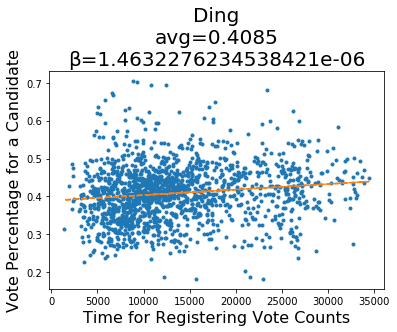

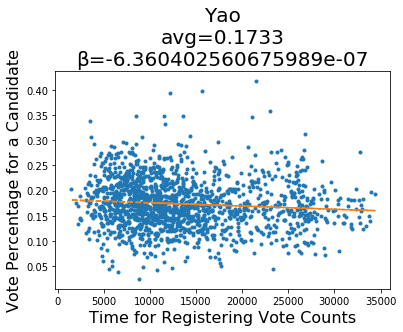

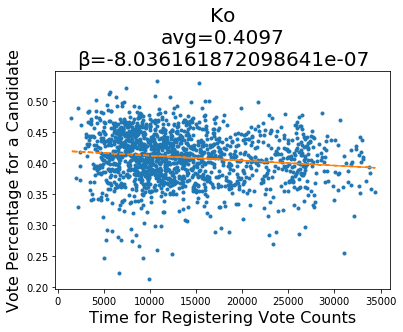

In [170]:
for vote_rateskey,vote_ratesvalue in vote_rates.items():
    #olsresults = sm.OLS(vote_ratesvalue,sm.add_constant(register_votes_timetamp)).fit()
    p = np.polyfit(register_votes_timetamp, vote_ratesvalue, deg=1)
    #print(olsresults.summary())
    #plt.plot(X_plot, X_plot*results_ding.params[0] + results_ding.params[1])
    plt.xlabel("Time for Registering Vote Counts", fontsize=16)
    plt.ylabel("Vote Percentage for a Candidate", fontsize=16)
    linex = register_votes_timetamp
    liney = p[1] + p[0] * linex
    #plt.scatter(register_votes_timetamp, vote_ratesvalue)
    plt.plot(register_votes_timetamp, vote_ratesvalue,'.')
    plt.plot(linex, liney, '--')
    avgrate_vote_rate = str(round(np.average(vote_ratesvalue),4))
    plt.title(vote_rateskey+'\navg='+avgrate_vote_rate+'\nβ='+str(p[0])+'', fontdict={'fontsize':20})
    plt.show()

In [149]:
results_ding